In [1]:
import pyCompare
import numpy as np
import xlrd
import math as m

In [2]:
# Give the location of the file 
loc = ("CTF+CA-SHGvsSYN.xlsx") 
  
# To open Workbook 
wb = xlrd.open_workbook(loc) 
real_shg_orient = []
syn_shg_orient = []
real_shg_align = []
syn_shg_align = []
sh_names = wb.sheet_names()[1:]
for i in sh_names:
    
    sheet = wb.sheet_by_name(i)
    
    real_shg_orient.extend(sheet.col_values(3)[1:])
    syn_shg_orient.extend(sheet.col_values(18)[1:])

    real_shg_align.extend(sheet.col_values(4)[1:])
    syn_shg_align.extend(sheet.col_values(19)[1:])
    
real_orient = np.asarray(real_shg_orient)/180 
syn_orient = np.asarray(syn_shg_orient)/180
real_align = np.asarray(real_shg_align)
syn_align = np.asarray(syn_shg_align)
norm_real_orient = np.sin(m.pi*real_orient)
norm_syn_orient = np.sin(np.pi*syn_orient)

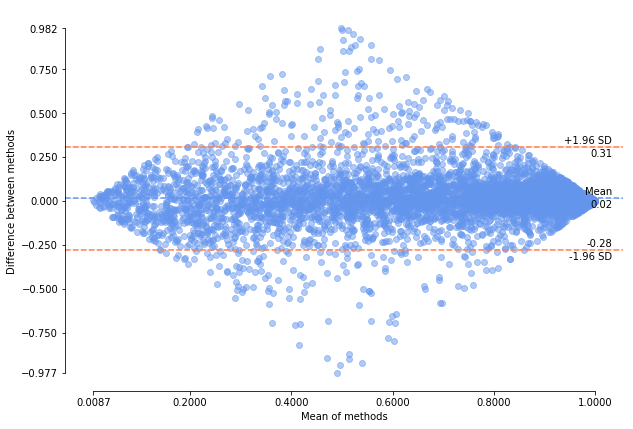

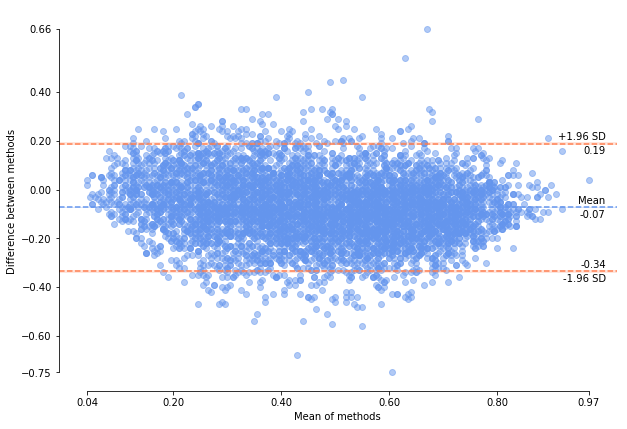

In [9]:
#pyCompare.blandAltman(norm_real_orient, norm_syn_orient, savePath='bland_altman_orientation.jpeg')
pyCompare.blandAltman(norm_real_orient, norm_syn_orient,confidenceInterval=80)
#pyCompare.blandAltman(180*real_orient, 180*syn_orient)

pyCompare.blandAltman(real_align, syn_align)


In [57]:
m=norm_real_orient-norm_syn_orient
thresh = np.linspace(0, 1, num=1000)
percentage=np.zeros(thresh.size)
for i,th in enumerate(thresh):
    a = m[m>th]
    a.extend(m[m<-th])
    percentage[i] = len(a)/len(m)
    if (percentage[i]<0.1005 and percentage[i]>0.099):
        print(thresh[i])

import matplotlib.pyplot as plt
# Plot the data
plt.plot(thresh, percentage, label='linear')
# Add a legend
plt.legend()

# Show the plot
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'extend'

In [145]:
np.corrcoef(real_align, syn_align)

array([[1.        , 0.77106151],
       [0.77106151, 1.        ]])

In [26]:
m=180*real_orient-180*syn_orient
a=m[m>20]
print(len(a)/len(m))

0.09287183002056203


In [10]:
num_orient_outlayer=0
num_align_outlayer=0

diff_orient=norm_real_orient-norm_syn_orient
diff_aling = real_align-syn_align

for i in range(len(diff_norm)):
    if(diff_orient[i]>0.31 or diff_orient[i]<-0.28):
        num_orient_outlayer=num_orient_outlayer+1;
    if(diff_aling[i]>0.18 or diff_aling[i]<-0.34):
        num_align_outlayer=num_align_outlayer+1;    
print(num_align_outlayer, num_orient_outlayer)
        

295 332


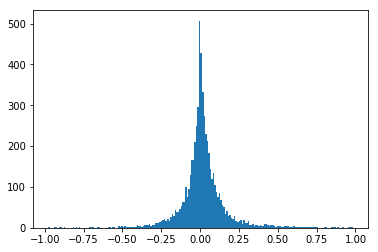

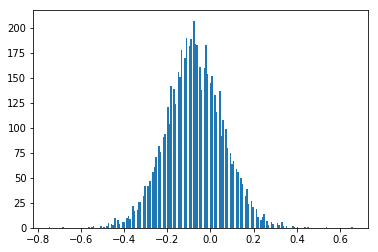

In [14]:
from matplotlib import pyplot
pyplot.hist(diff_orient, bins=200)
pyplot.show()
pyplot.hist(diff_aling, bins=200)
pyplot.show()

In [20]:
from scipy.stats import anderson

result = anderson(diff_aling)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 2.940
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
